<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Machine_Learning/ML17_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

# Fashion MNIST datasets

In [ ]:
(x_tr_f, y_tr_f), (x_ts, y_ts) = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_tr_f.shape

(60000, 28, 28)

In [ ]:
x_ts.shape

(10000, 28, 28)

0~255 정수 범위의 입력값들을 0.0 ~ 1.0 범위의 실수(float)으로 변환 -> 훈련 성능을 높이기 위해서

In [ ]:
np.max(x_tr_f), np.min(x_tr_f)

(255, 0)

In [ ]:
x_tr_f_s = x_tr_f/ 255
x_ts_s = x_ts / 255

훈련 셋 전체를 훈련셋과 검증셋으로 나눔

In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(x_tr_f_s,y_tr_f,
                                            stratify = y_tr_f,
                                            test_size = 0.1,
                                            random_state = 42)

In [ ]:
x_tr.shape,y_tr.shape

((54000, 28, 28), (54000,))

# DNN

input layer -> flatten layer -> dense layer(300 units) -> dense layer(100 units) -> output layer

In [ ]:
# Sequential 모델 생성
model = keras.Sequential()
# flatten layer
model.add(keras.layers.Flatten(input_shape = (28,28)))

In [ ]:
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


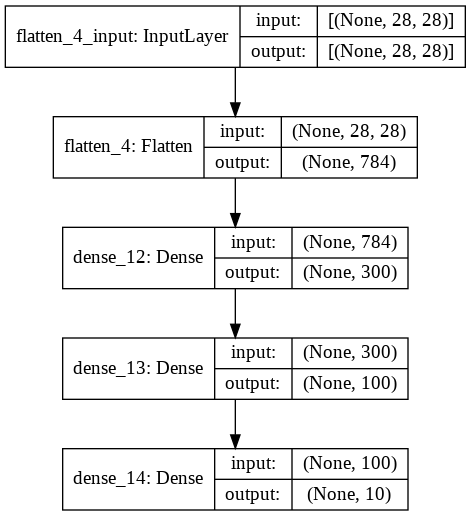

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='dnn1.png')

In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(x_tr,y_tr,epochs=30,
          validation_data=(x_val,y_val))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9689 - accuracy: 0.7057 - val_loss: 0.5445 - val_accuracy: 0.8058
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5022 - accuracy: 0.8291 - val_loss: 0.4536 - val_accuracy: 0.8448
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4504 - accuracy: 0.8420 - val_loss: 0.4192 - val_accuracy: 0.8600
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4238 - accuracy: 0.8505 - val_loss: 0.3920 - val_accuracy: 0.8652
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4035 - accuracy: 0.8586 - val_loss: 0.3922 - val_accuracy: 0.8598
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3919 - accuracy: 0.8617 - val_loss: 0.4138 - val_accuracy: 0.8492
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8647 - val_loss: 0.3512 - val_accuracy:

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.params

{'epochs': 30, 'steps': 1688, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
np.around(history.history['val_loss'],decimals=4)

array([0.5445, 0.4536, 0.4192, 0.392 , 0.3922, 0.4138, 0.3512, 0.354 ,
       0.3416, 0.3753, 0.3294, 0.3613, 0.3435, 0.324 , 0.332 , 0.3285,
       0.3448, 0.3054, 0.3161, 0.3132, 0.306 , 0.2918, 0.2988, 0.3225,
       0.3257, 0.2976, 0.2972, 0.3204, 0.3114, 0.2955])

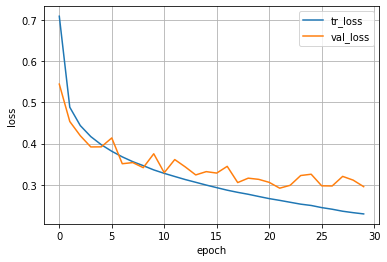

In [ ]:
# 손실 곡선
plt.plot(history.epoch, history.history['loss'], label ='tr_loss')
plt.plot(history.epoch, history.history['val_loss'], label ='val_loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

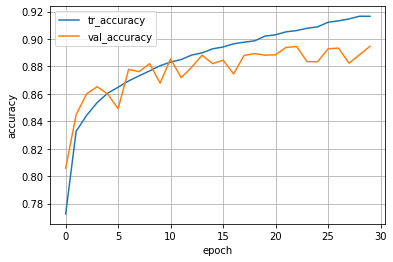

In [ ]:
# 정확도 곡선

plt.plot(history.epoch, history.history['accuracy'], label ='tr_accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label ='val_accuracy')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

손실 곡선과 정확도 곡선을 그려보면

* 훈련 셋에서는 손실과 정확도가 꾸준히 개선됨
* 검증 셋에서는 어느 순간(epoch)까지는 손실이 줄어들고, 정확도 좋아지다가, 어느 순간 이후로는 더 이상 개선되지 않음. => 과대적합(overfitting)
* epoch를 적절한 순간에 멈추는 기법이 필요.


In [ ]:
loss_acc_hist = pd.DataFrame(history.history)
loss_acc_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.709242,0.772463,0.544489,0.805833
1,0.488309,0.832759,0.453650,0.844833
2,0.443816,0.844352,0.419233,0.860000
3,0.417071,0.853593,0.391958,0.865167
4,0.397384,0.860426,0.392163,0.859833


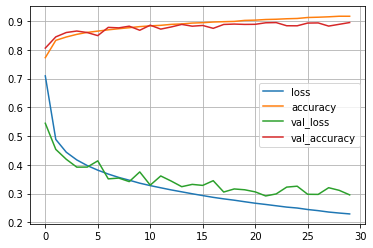

In [ ]:
loss_acc_hist.plot()

plt.grid()
plt.show()

## optimizer 튜닝
 밑바닥부터 시작하는 딥러닝 6장 참고

* sgd
* RMSProp
* Adam

In [ ]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    model.add(keras.layers.Dense(units=300, activation='relu'))
    model.add(keras.layers.Dense(units=100, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    return model

### SGD

In [ ]:
model1 = create_model()

In [ ]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.SGD()
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history1 = model1.fit(x_tr,y_tr,epochs=30,validation_data=(x_ts_s,y_ts))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9716 - accuracy: 0.6981 - val_loss: 0.5569 - val_accuracy: 0.8026
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5065 - accuracy: 0.8241 - val_loss: 0.5108 - val_accuracy: 0.8155
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4564 - accuracy: 0.8402 - val_loss: 0.4818 - val_accuracy: 0.8302
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4234 - accuracy: 0.8510 - val_loss: 0.4537 - val_accuracy: 0.8337
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3979 - accuracy: 0.8609 - val_loss: 0.4206 - val_accuracy: 0.8494
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3852 - accuracy: 0.8644 - val_loss: 0.4411 - val_accuracy: 0.8458
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3681 - accuracy: 0.8699 - val_loss: 0.3961 - val_accuracy:

In [ ]:
hist1 = pd.DataFrame(history1.history)
hist1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.709199,0.769685,0.556851,0.8026
1,0.490462,0.828296,0.510776,0.8155
2,0.445002,0.844241,0.481829,0.8302
3,0.418664,0.852722,0.453681,0.8337
4,0.398747,0.859722,0.420558,0.8494


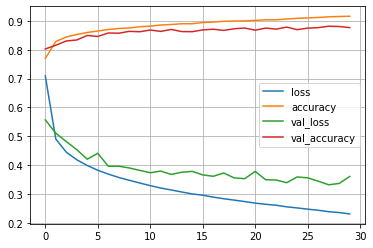

In [ ]:
hist1.plot()

plt.grid()
plt.show()

In [ ]:
np.argmin(hist1['val_loss'])

27

In [ ]:
np.argmax(hist1['val_accuracy'])

27

### RMSProp

In [ ]:
model2 = create_model()

In [ ]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history2 = model2.fit(x_tr,y_tr,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6413 - accuracy: 0.7709 - val_loss: 0.3960 - val_accuracy: 0.8602
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3973 - accuracy: 0.8571 - val_loss: 0.4082 - val_accuracy: 0.8595
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8679 - val_loss: 0.4655 - val_accuracy: 0.8518
Epoch 4/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3562 - accuracy: 0.8739 - val_loss: 0.3685 - val_accuracy: 0.8827
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3368 - accuracy: 0.8805 - val_loss: 0.3385 - val_accuracy: 0.8768
Epoch 6/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3362 - accuracy: 0.8848 - val_loss: 0.3782 - val_accuracy: 0.8735
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8848 - val_loss: 0.3539 - val_accuracy:

In [ ]:
hist2 = pd.DataFrame(history2.history)
hist2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.509673,0.816741,0.396047,0.860167
1,0.393241,0.859648,0.408176,0.859500
2,0.368959,0.869741,0.465487,0.851833
3,0.355850,0.875519,0.368515,0.882667
4,0.348124,0.880000,0.338547,0.876833


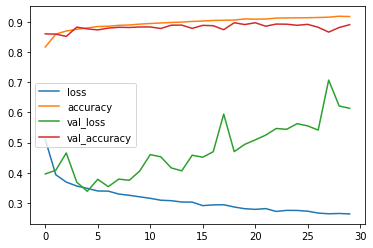

In [ ]:
hist2.plot()
plt.grid
plt.show()

In [ ]:
np.argmin(hist2['val_loss'])

4

In [ ]:
np.min(hist2['val_loss'])

0.33854731917381287

### Adam, Nadam

## Callbacks

콜백(callback): 훈련 과정(fit) 중간에 어떤 작업을 수행할 수 있도록 하는 함수. 모델을 훈련(fitting) 할 때 등록

### EarlyStopping

In [ ]:
model3 = create_model()

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=2) # 조기 종영 콜백
#> val_loss를 모니터링 하다가 val_loss가 patience 횟수 동안에 더이상 감소하지 않으면 epoch를 강제 종료

history3 = model3.fit(x_tr,y_tr,epochs=30,
           validation_data = (x_val,y_val),
           callbacks=[early_stop])

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5994 - accuracy: 0.7828 - val_loss: 0.3781 - val_accuracy: 0.8642
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3785 - accuracy: 0.8585 - val_loss: 0.3349 - val_accuracy: 0.8778
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3238 - accuracy: 0.8780 - val_loss: 0.3386 - val_accuracy: 0.8773
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.8839 - val_loss: 0.2972 - val_accuracy: 0.8885
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8959 - val_loss: 0.2985 - val_accuracy: 0.8875
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.8988 - val_loss: 0.3136 - val_accuracy: 0.8792


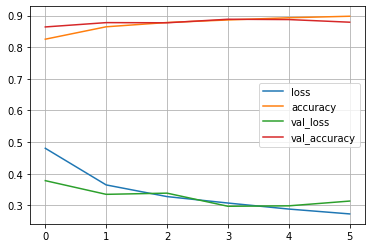

In [ ]:
hist3 = pd.DataFrame(history3.history)

hist3.plot()
plt.grid()
plt.show()

In [ ]:
model4 = create_model()

In [ ]:
model4.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
history4 = model4.fit(x_tr,y_tr, epochs=30,
           validation_data = (x_val,y_val),
           callbacks=[early_stop])

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6319 - accuracy: 0.7731 - val_loss: 0.4498 - val_accuracy: 0.8410
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3905 - accuracy: 0.8587 - val_loss: 0.3951 - val_accuracy: 0.8583
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3652 - accuracy: 0.8702 - val_loss: 0.4019 - val_accuracy: 0.8603
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3485 - accuracy: 0.8804 - val_loss: 0.3556 - val_accuracy: 0.8782
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3437 - accuracy: 0.8813 - val_loss: 0.3546 - val_accuracy: 0.8817
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3320 - accuracy: 0.8860 - val_loss: 0.4502 - val_accuracy: 0.8673
Epoch 7/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3266 - accuracy: 0.8882 - val_loss: 0.3902 - val_accuracy:

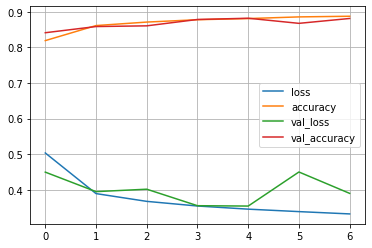

In [ ]:
hist4 = pd.DataFrame(history4.history)
hist4.plot()
plt.grid()
plt.show()

In [ ]:
model4.evaluate(x_val, y_val)
#> 에포크가 종료된 상태의 가중치 값들을 가지고 있는 모델.
#> val_loss가 가장 작은 상태의 가중치들을 가지고 있지 못함

188/188 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8810


[0.39017176628112793, 0.8809999823570251]

### ModelCheckpoint 콜백

In [ ]:
model5 = create_model()

In [ ]:
model5.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model_check = keras.callbacks.ModelCheckpoint(filepath='best_model.h5',save_best_only=True)
# 훈련 중에 val_loss값이 가장 작은 에포크에서의 모델 상태(가중치, 레이어, 옵티마이저,...)를 저장.

In [ ]:
model5.fit(x_tr,y_tr, epochs=30, validation_data = (x_val,y_val),
           callbacks = [model_check, early_stop])

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6304 - accuracy: 0.7730 - val_loss: 0.4058 - val_accuracy: 0.8512
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3954 - accuracy: 0.8585 - val_loss: 0.3707 - val_accuracy: 0.8672
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3668 - accuracy: 0.8713 - val_loss: 0.4386 - val_accuracy: 0.8523
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3557 - accuracy: 0.8776 - val_loss: 0.5673 - val_accuracy: 0.8133


In [ ]:
model5.evaluate(x_val,y_val)

188/188 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.8133


[0.5672839283943176, 0.8133333325386047]

In [ ]:
# HDF5(.h5) 형식으로 저장된 keras 신경망 모델을 메모리에 로드
best_model = keras.models.load_model(filepath='best_model.h5')

In [ ]:
best_model.evaluate(x_val,y_val)

188/188 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8672


[0.3707377016544342, 0.8671666383743286]

# 케라스 모델 저장 / 가중치 정과 복원

## 모델 전체를 저장 / 복원

In [ ]:
keras.models.save_model(model=best_model, filepath='save_test.h5') # 모델전체 저장

In [ ]:
recovered_model = keras.models.load_model('save_test.h5') # 모델전체 복원

In [ ]:
recovered_model.predict(x_val[:2])

array([[1.2845752e-01, 2.5945585e-03, 1.3274658e-02, 7.7486914e-01,
        5.3200289e-03, 3.5119703e-07, 7.5050123e-02, 2.1962954e-07,
        4.3076149e-04, 2.6617956e-06],
       [3.5677035e-09, 9.9999976e-01, 9.6553720e-12, 1.9215304e-07,
        2.5219816e-11, 7.0602307e-10, 4.2511404e-11, 2.2770312e-14,
        1.6545987e-12, 1.9198310e-14]], dtype=float32)

In [ ]:
recovered_model.evaluate(x_val,y_val)

188/188 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8672


[0.3707377016544342, 0.8671666383743286]

## 모델의 가중치만 저장

In [ ]:
best_model.save_weights(filepath='best_weight.h5') # 모델의 가중치만 저장

In [ ]:
# 파일에 저장된 가증치를 메모리에 로드 하려면, 가중치를 저장했던 모델과 동일한 모델을 먼저 생성
# 동일한 layer 개수, 각 증에서 동일한 unit들의 개수와 
model = create_model()

In [ ]:
# 구조가 동일한 모델에서 load_weights 메서드 호출
model.load_weights(filepath='best_weight.h5')

In [ ]:
# weight가 로드가 되면 예측(predict)가 가능.
model.predict(x_val[:2])

array([[1.2845752e-01, 2.5945585e-03, 1.3274658e-02, 7.7486914e-01,
        5.3200289e-03, 3.5119703e-07, 7.5050123e-02, 2.1962954e-07,
        4.3076149e-04, 2.6617956e-06],
       [3.5677035e-09, 9.9999976e-01, 9.6553720e-12, 1.9215304e-07,
        2.5219816e-11, 7.0602307e-10, 4.2511404e-11, 2.2770312e-14,
        1.6545987e-12, 1.9198310e-14]], dtype=float32)

In [ ]:
model.evaluate(x_val,y_val) #> 안됨
# RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`
# 가중치들만 로드한 모델인 경우에는 컴파일되지 않으면, loss와 metrics이 설정되어 있지 않기 때문에,
# evaluate 메서드가 에러를 발생시킴.
# 가중치들만 로드한 경우에는 evaluate를 사용하기 위해서는 complie을 먼저 호출해야 함!

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(x_val,y_val)

188/188 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8679


[0.3707377016544342, 0.8671666383743286]

## DropOut 규제

input layer -> flatten layer -> dense layer -> dropout -> dense layer -> drop out -> out put layer

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=10, activation='softmax'))

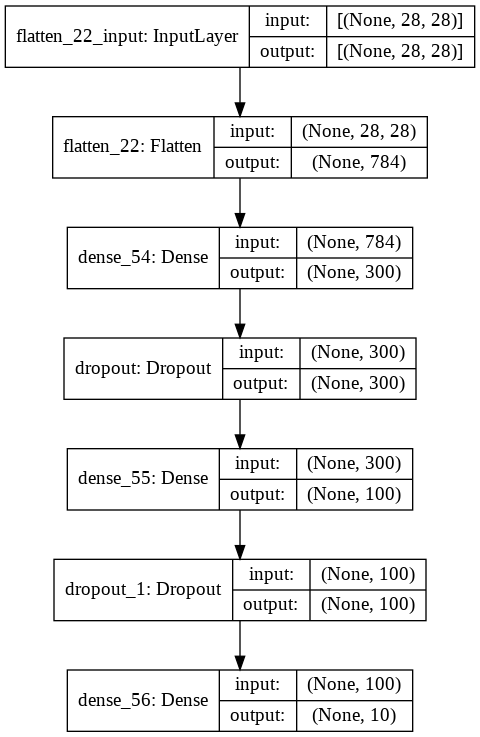

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='dnn.png')

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model_check = keras.callbacks.ModelCheckpoint(filepath='dropout_best.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=2)

history = model.fit(x_tr,y_tr,epochs=30, validation_data=(x_val,y_val),
                    callbacks = [model_check, early_stop])

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7606 - accuracy: 0.7273 - val_loss: 0.4203 - val_accuracy: 0.8487
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4891 - accuracy: 0.8317 - val_loss: 0.4115 - val_accuracy: 0.8478
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4819 - accuracy: 0.8412 - val_loss: 0.4585 - val_accuracy: 0.8373
Epoch 4/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4963 - accuracy: 0.8421 - val_loss: 0.4348 - val_accuracy: 0.8617


In [ ]:
model_check = keras.callbacks.ModelCheckpoint(filepath='dropout_best.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=2)

history = model.fit(x_tr,y_tr,epochs=30, validation_data=(x_val,y_val),
                    callbacks = [model_check])

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7733 - accuracy: 0.7263 - val_loss: 0.5414 - val_accuracy: 0.8102
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4910 - accuracy: 0.8334 - val_loss: 0.4030 - val_accuracy: 0.8587
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4855 - accuracy: 0.8384 - val_loss: 0.3672 - val_accuracy: 0.8708
Epoch 4/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4878 - accuracy: 0.8432 - val_loss: 0.3891 - val_accuracy: 0.8672
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4830 - accuracy: 0.8499 - val_loss: 0.4016 - val_accuracy: 0.8758
Epoch 6/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4837 - accuracy: 0.8514 - val_loss: 0.4086 - val_accuracy: 0.8645
Epoch 7/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4968 - accuracy: 0.8500 - val_loss: 0.4015 - val_accuracy:

In [ ]:
hist = pd.DataFrame(history.history)

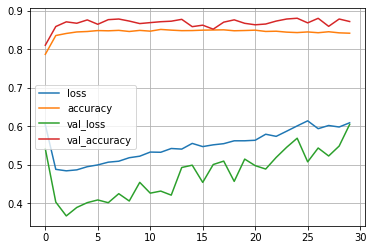

In [ ]:
hist.plot()
plt.grid()
plt.show()